# Simulate X-ray binaries in the Milky Way

In [1]:
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

import cogsworth

In [2]:
# ensure jupyter actually uses your fancy retina display
%config InlineBackend.figure_format = 'retina'

# make pandas show *every* column
pd.set_option("display.max_columns", None)

# various adjustments to matplotlib settings
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# The Goal

Let's try to simulate a population of Milky Way X-ray binaries and see how close each came to the Earth. During this process we can learn how to:
- Mask a population
- Change initial binary sampling routines
- Re-run a subpopulation in more detail
- Track the galactic locations of binaries

# Evolve and mask a population

Let's start by just evolving a simple population and masking it to select different subpopulations.

In [3]:
p = cogsworth.pop.Population(1000)
p.create_population()

Run for 1000 binaries
Ended up with 1332 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries


[0.8s] Evolve binaries (run COSMIC)


1338it [00:06, 208.47it/s]                          


[9.4s] Get orbits (run gala)
Overall: 10.3s


In [4]:
# each binary has a unique identifier, accessed in
p.bin_nums

array([   0,    1,    2, ..., 1329, 1330, 1331])

## Based on final state

How did the binary end?

In [5]:
p.final_bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
0,9850.211317,0.282978,0.217501,0.0,0.0,10.947972,5.934441,0.670944,0.199555,0.187986,10.0,9850.211317,9850.211317,4.355753e+05,7.411564e+05,0.0,0.0,0.288921,0.241344,0.282978,0.217501,0.012469,0.007437,3604.426135,3465.731027,0.0,0.0,0.282978,0.217501,0.288921,0.241344,886.510269,2164.735448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.008722
1,9071.276380,0.290229,0.125180,0.0,0.0,391.088084,1390.740186,0.153450,0.001972,0.001570,10.0,9071.276380,9071.276380,4.284868e+05,2.315662e+06,0.0,0.0,0.295843,0.160556,0.290229,0.125180,0.012459,0.001828,3561.336854,2991.894017,0.0,0.0,0.290229,0.062590,0.295843,0.104361,0.127074,0.000325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.012783
2,8272.969072,0.355159,0.123033,0.0,0.0,11638.555495,210435.765361,0.079291,0.000068,0.000051,10.0,8272.969072,8272.969072,2.893879e+05,2.451480e+06,0.0,0.0,0.343730,0.160375,0.355159,0.123033,0.017740,0.001713,3609.089057,2945.349875,0.0,0.0,0.353992,0.061517,0.342124,0.104244,0.530865,0.000284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.017061
3,6930.607994,0.347987,0.242456,0.0,0.0,55.885661,63.013507,0.413852,0.025047,0.023020,10.0,6930.607994,6930.607994,2.968573e+05,6.210639e+05,0.0,0.0,0.336848,0.262498,0.347987,0.242456,0.017404,0.008580,3628.387439,3444.104200,0.0,0.0,0.347987,0.242456,0.336848,0.262498,0.477318,0.051836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.013949
4,9211.582570,0.221450,0.091215,0.0,0.0,5.618891,2.760631,0.183605,0.115511,0.103346,10.0,9211.582570,9211.582570,6.801138e+05,4.013216e+06,0.0,0.0,0.242295,0.144758,0.221450,0.091215,0.008306,0.000712,3555.915375,2488.912090,0.0,0.0,0.221450,0.045607,0.242295,0.094093,12.264924,13.011761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.005493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,11369.459166,0.188505,0.107773,0.0,0.0,268.445425,936.496702,0.020307,0.001893,0.001581,10.0,11369.459166,11369.459166,8.559978e+05,2.619407e+06,0.0,0.0,0.213141,0.137909,0.188505,0.107773,0.006491,0.001397,3564.679857,3018.247573,0.0,0.0,0.094252,0.053887,0.138542,0.089641,0.006018,0.000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327,0.003000
1328,5081.439544,0.152070,0.123956,0.0,0.0,3.757804,1.606936,0.615047,0.324792,0.300453,10.0,5081.439544,5081.439544,1.531365e+06,2.304650e+06,0.0,0.0,0.186402,0.157059,0.152070,0.123956,0.003180,0.001837,3189.099179,3028.712720,0.0,0.0,0.076035,0.061978,0.121161,0.102089,3218.317109,5121.131319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1328,0.009836
1329,9666.185681,0.235651,0.232812,0.0,0.0,5.391459,2.119794,0.065928,0.130633,0.130195,10.0,9666.185681,9666.185681,4.936018e+05,5.058460e+05,0.0,0.0,0.249971,0.247757,0.235651,0.232812,0.010608,0.010384,3721.668742,3718.305757,0.0,0.0,0.117826,0.116406,0.162481,0.161042,78.802561,79.135841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1329,0.001678
1330,5717.831448,0.160567,0.098735,0.0,0.0,66.775538,124.192627,0.029974,0.006829,0.006497,10.0,5717.831448,5717.831448,1.160353e+06,3.068406e+06,0.0,0.0,0.186493,0.142108,0.160567,0.098735,0.004544,0.001032,3485.805021,2756.501725,0.0,0.0,0.080283,0.049367,0.121220,0.092370,0.001962,0.000057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330,0.002721


In [6]:
# binaries where the primary mass is greater than 1 solar mass
(p.final_bpp["mass_1"] > 1).sum()

51

In [7]:
# binaries where the secondary is not on the main sequence and the binary is bound
((p.final_bpp["kstar_2"] > 1) & (p.final_bpp["sep"] >= 0.0)).sum()

117

## Based on initial conditions

What kind of binary was initially formed?

In [8]:
p.initC

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,binfrac,tphysf,mass0_1,mass0_2,rad_1,rad_2,lum_1,lum_2,massc_1,massc_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,neta,bwind,hewind,alpha1,lambdaf,ceflag,tflag,ifflag,wdflag,pisn,rtmsflag,bhflag,remnantflag,grflag,bhms_coll_flag,wd_mass_lim,cekickflag,cemergeflag,cehestarflag,mxns,pts1,pts2,pts3,ecsn,ecsn_mlow,aic,ussn,sigma,sigmadiv,bhsigmafrac,polar_kick_angle,beta,xi,acc2,epsnov,eddfac,gamma,don_lim,acc_lim,bdecayfac,bconst,ck,windflag,qcflag,eddlimflag,dtp,randomseed,bhspinflag,bhspinmag,rejuv_fac,rejuvflag,htpmb,ST_cr,ST_tide,rembar_massloss,zsun,kickflag,bin_num,natal_kick_1,phi_1,theta_1,mean_anomaly_1,randomseed_1,natal_kick_2,phi_2,theta_2,mean_anomaly_2,randomseed_2,qcrit_0,qcrit_1,qcrit_2,qcrit_3,qcrit_4,qcrit_5,qcrit_6,qcrit_7,qcrit_8,qcrit_9,qcrit_10,qcrit_11,qcrit_12,qcrit_13,qcrit_14,qcrit_15,fprimc_0,fprimc_1,fprimc_2,fprimc_3,fprimc_4,fprimc_5,fprimc_6,fprimc_7,fprimc_8,fprimc_9,fprimc_10,fprimc_11,fprimc_12,fprimc_13,fprimc_14,fprimc_15,phase_sn_1,phase_sn_2,inc_sn_1,inc_sn_2
0,0.0,0.0,0.282978,0.217501,6.177920,0.679764,0.008722,0.5,9850.211317,0.282978,0.217501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,1,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,9850.211317,-1491817779,0,0.0,1.0,0,1,1,1,0.5,0.014,0,0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,2.587966,5.223039,5.583203,1.973966
1,0.0,0.0,0.290229,0.125180,1390.740186,0.153450,0.012783,0.5,9071.276380,0.290229,0.125180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,1,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,9071.276380,2060238859,0,0.0,1.0,0,1,1,1,0.5,0.014,0,1,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,4.221667,5.384069,6.018601,3.436688
2,0.0,0.0,0.355159,0.123033,210435.765361,0.079291,0.017061,0.5,8272.969072,0.355159,0.123033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,1,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,8272.969072,294457772,0,0.0,1.0,0,1,1,1,0.5,0.014,0,2,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.781078,2.644178,5.825711,4.812094
3,0.0,0.0,0.347987,0.242456,63.013529,0.413852,0.013949,0.5,6930.607994,0.347987,0.242456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0,0,1,0,1,45.0,0,1,4,1,0,1,2,0,0,3.0,0.001,0.01,0.02,2.25,1.6,1,0,265.0,-20.0,1.0,90,-1.0,1.0,1.5,0.001,1.0,-2.0,-1,-1,1,3000,1000,3,5,0,6930.607994,814877609,0,0.0,1.0,0,1,1,1,0.5,0.014,0,3,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,0.0

In [9]:
p.initial_galaxy

<Wagg2022, size=1332>

In [10]:
# binaries with an initial period less than 10 days
(p.initC["porb"] < 10).sum()

447

In [11]:
# binaries formed within the last 5 Gyr, more than 10 pc from the galactic plane
# and with a primary mass greater than 1 solar mass
((p.initial_galaxy.tau > 5 * u.Gyr)
 & (abs(p.initial_galaxy.z) > 10 * u.pc)
 & (p.initC["mass_1"] > 1)).sum()

156

## Based on evolution
What happened during a binary's evolution?

In [12]:
p.orbits
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,0.282978,0.217501,0.0,0.0,11.245411,6.177920,0.679764,0.198666,0.187522,1.0,0.000000,0.000000,4.355753e+05,7.411564e+05,0.0,0.0,0.287530,0.240661,0.282978,0.217501,0.012376,0.007405,3606.409551,3466.892896,0.0,0.0,0.282978,0.217501,0.287530,0.240661,0.107701,0.016391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,9850.211317,0.282978,0.217501,0.0,0.0,10.947972,5.934441,0.670944,0.199555,0.187986,10.0,9850.211317,9850.211317,4.355753e+05,7.411564e+05,0.0,0.0,0.288921,0.241344,0.282978,0.217501,0.012469,0.007437,3604.426135,3465.731027,0.0,0.0,0.282978,0.217501,0.288921,0.241344,886.510269,2164.735448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.290229,0.125180,0.0,0.0,391.088084,1390.740186,0.153450,0.001964,0.001568,1.0,0.000000,0.000000,4.284868e+05,2.315662e+06,0.0,0.0,0.294603,0.160431,0.290229,0.125180,0.012372,0.001826,3562.527261,2992.088394,0.0,0.0,0.290229,0.062590,0.294603,0.104280,0.128146,0.000325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,9071.276380,0.290229,0.125180,0.0,0.0,391.088084,1390.740186,0.153450,0.001972,0.001570,10.0,9071.276380,9071.276380,4.284868e+05,2.315662e+06,0.0,0.0,0.295843,0.160556,0.290229,0.125180,0.012459,0.001828,3561.336854,2991.894017,0.0,0.0,0.290229,0.062590,0.295843,0.104361,0.127074,0.000325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.355159,0.123033,0.0,0.0,11638.555495,210435.765361,0.079291,0.000068,0.000051,1.0,0.000000,0.000000,2.893879e+05,2.451480e+06,0.0,0.0,0.341925,0.160275,0.355159,0.123033,0.017567,0.001711,3609.742793,2945.442579,0.0,0.0,0.353992,0.061517,0.340327,0.104179,0.536485,0.000284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,9666.185681,0.235651,0.232812,0.0,0.0,5.391459,2.119794,0.065928,0.130633,0.130195,10.0,9666.185681,9666.185681,4.936018e+05,5.058460e+05,0.0,0.0,0.249971,0.247757,0.235651,0.232812,0.010608,0.010384,3721.668742,3718.305757,0.0,0.0,0.117826,0.116406,0.162481,0.161042,78.802561,79.135841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1329
1330,0.000000,0.160567,0.098735,0.0,0.0,66.775538,124.192628,0.029974,0.006821,0.006497,1.0,0.000000,0.000000,1.160353e+06,3.068406e+06,0.0,0.0,0.186281,0.142108,0.160567,0.098735,0.004533,0.001031,3485.595906,2755.842714,0.0,0.0,0.080283,0.049367,0.121082,0.092370,0.001967,0.000057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330
1330,5717.831448,0.160567,0.098735,0.0,0.0,66.775538,124.192627,0.029974,0.006829,0.006497,10.0,5717.831448,5717.831448,1.160353e+06,3.068406e+06,0.0,0.0,0.186493,0.142108,0.160567,0.098735,0.004544,0.001032,3485.805021,2756.501725,0.0,0.0,0.080283,0.049367,0.121220,0.092370,0.001962,0.000057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330
1331,0.000000,0.449776,0.432252,0.0,0.0,13.520900,6.135353,0.022913,0.081824,0.080353,1.0,0.000000,0.000000,1.636957e+05,1.800454e+05,0.0,0.0,0.413329,0.398595,0.449776,0.432252,0.029860,0.027240,3748.823721,3730.836477,0.0,0.0,0.196582,0.217577,0.188164,0.196748,2.820432,2.142624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1331


In [13]:
# experienced a common-envelope phase
(p.bpp["evol_type"] == 7).sum()

130

In [14]:
# had mass transfer within the first 20 Myr
((p.bpp["tphys"] < 20 * u.Myr) & (p.bpp["evol_type"] == 3)).sum()

9

In [15]:
# primary star was ever further than 1kpc from the galactic plane
sum([(abs(p.primary_orbits[i].z) > 1 * u.kpc).any() for i in range(len(p))])

237

## Kitchen sink

Let's put it all together!

In [16]:
# final binary is bound, formed with an initial period less than 10 days
# experienced mass transfer and has a metallicity less than ~solar
((p.final_bpp["sep"] == 0)
 & (p.initC["porb"] < 10)
 & (np.isin(p.bin_nums, p.bpp[p.bpp["evol_type"] == 3]["bin_num"]))
 & (p.initial_galaxy.Z < 0.02)).sum()

41

## Question: How do I select X-ray binaries?

What do you need to have an X-ray binary?

In [93]:
def potential_xrb_mask(p):
    """Return a mask for potential X-ray binaries"""
    # at some point there was mass transfer from a star onto a compact object
    xrb_mask = ((p.bpp["evol_type"] == 3)
                 & (((p.bpp["kstar_1"] == 14) & (p.bpp["kstar_2"] < 10))
                    | ((p.bpp["kstar_2"] == 14) & (p.bpp["kstar_1"] < 10))))
    return np.isin(p.bin_nums, p.bpp[xrb_mask]["bin_num"].unique())

In [94]:
potential_xrb_mask(p).sum()

1

Let's try to make a larger population than that

# Preferentially sample higher masses

You can change how `cogsworth` samples binaries to preferentially create certain populations

Let's change things to preferentially sample higher mass systems (more likely to be XRBs)

In [55]:
q = cogsworth.pop.Population(1000, final_kstar1=[13, 14])
q.create_population()

Run for 1000 binaries
Ended up with 1005 binaries with m1 > 0 solar masses
[4e-02s] Sample initial binaries
[3.8s] Evolve binaries (run COSMIC)


1155it [00:06, 172.04it/s]                         


[8.6s] Get orbits (run gala)
Overall: 12.5s


In [95]:
potential_xrb_mask(q).sum()

19

And note this is still consistently sampling the same IMF, just the normalisation is different now.

In [96]:
(q.mass_binaries + q.mass_singles) / (p.mass_binaries + p.mass_singles)

20.679994446615257

Now let's apply our mask to create a whole new population with just systems that sometimes could be XRBs.

In [97]:
xrbs = q[potential_xrb_mask(q)]

# Re-evolve them with more detail
This doesn't necessarily give us the full detail of exactly what information we might want for these binaries though. We can re-run things to get the detailed evolution of each binary, not just when certain events occur.

In [98]:
xrbs.bcm

cogsworth warning: You haven't set any timestep conditions for the BCM table, so it is not calculated. Set `bcm_timestep_conditions` to get a BCM table.


In [112]:
xrbs.bcm_timestep_conditions = [
    ['kstar_1>=13', 'kstar_2<10', 'RRLO_2>=1', 'dtp=0.0'],
    ['kstar_2>=13', 'kstar_1<10', 'RRLO_1>=1', 'dtp=0.0'],
]

In [113]:
xrbs.perform_stellar_evolution()

In [114]:
xrbs.bcm.groupby("bin_num").size()

bin_num
24       3
98     316
152      3
198      4
323      3
503    594
592      3
621     78
622    537
652      4
691      4
740      3
744    805
785      3
870    364
875      4
882      4
931    411
986      4
dtype: int64

# Track their locations at the start of the XRB phase
Which one is closest to the Sun's present day position?

### Exercise
Modify the `potential_xrb_mask` function to return the time at which each systems starts being an XRB

In [102]:
def xrb_start_time(p):
    """Return a mask for potential X-ray binaries"""
    # at some point there was mass transfer from a star onto a compact object
    xrb_mask = ((p.bpp["evol_type"] == 3)
                 & ((p.bpp["kstar_1"].isin([13, 14]) & (p.bpp["kstar_2"] < 10))
                    | (p.bpp["kstar_2"].isin([13, 14]) & (p.bpp["kstar_1"] < 10))))
    return p.bpp[xrb_mask].drop_duplicates(subset="bin_num")["tphys"]

In [103]:
t_start = xrb_start_time(xrbs).values * u.Myr
t_start

<Quantity [ 6.47567284, 29.55846983,  7.40433402,  4.55276755,  8.07261864,
            5.22602   ,  8.25702621,  4.49315862,  4.50067887,  8.90471944,
            6.28697763,  7.88336926,  7.17206058,  8.03248029,  9.08029915,
            7.31763195,  7.8802499 ,  4.84215325,  5.24109201] Myr>

## Get the positions and plot the orbit of the closest

In [104]:
xrb_pos = np.array([xrbs.primary_orbits[i][xrbs.primary_orbits[i].t >= xrbs.primary_orbits[i].t[0] + t_start[i]][0].xyz
                    for i in range(len(xrbs))]) * u.kpc

In [105]:
sun_pos = np.array([8.122, 0, 0]) * u.kpc

In [120]:
closest_bin_num = xrbs.bin_nums[np.linalg.norm(xrb_pos - sun_pos, axis=1).argmin()]

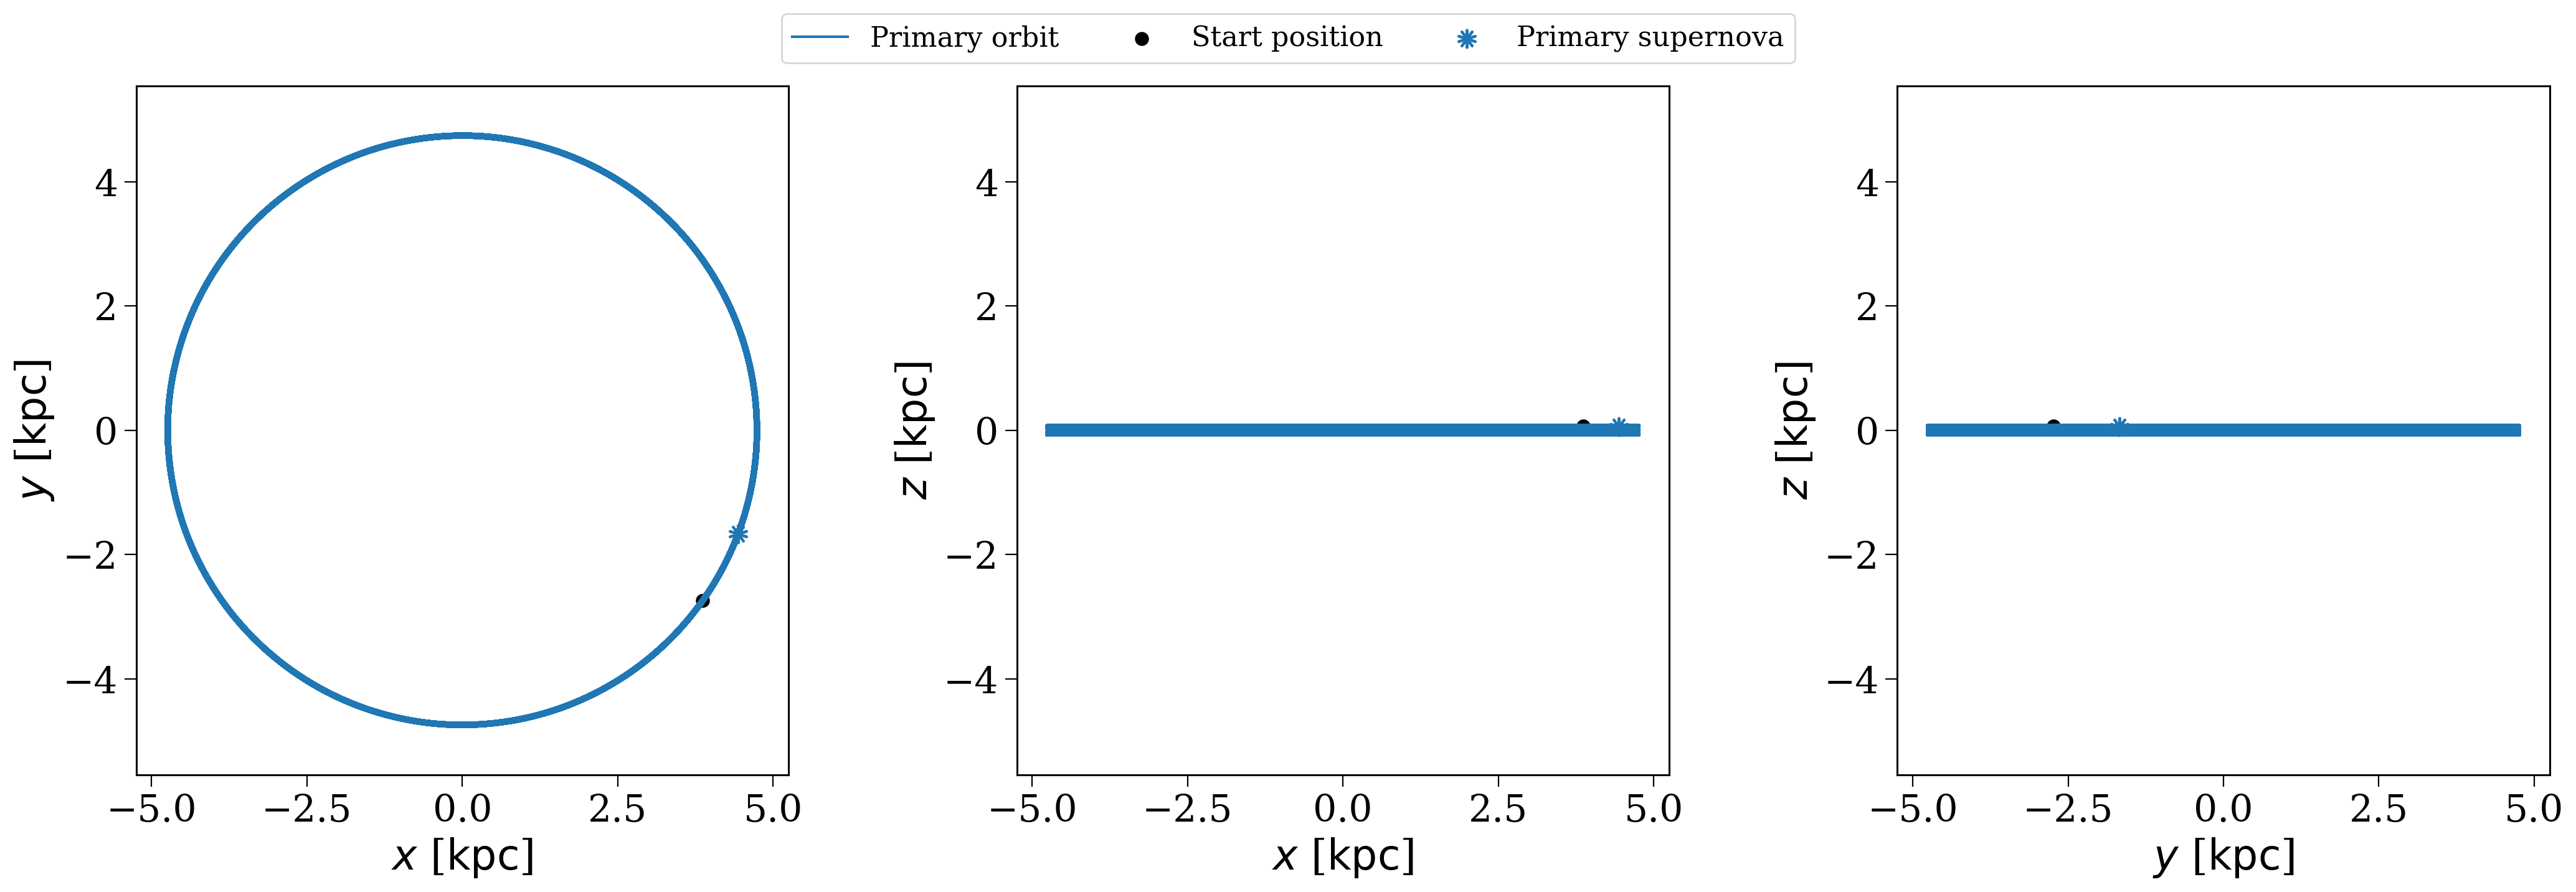

(<Figure size 2500x700 with 3 Axes>,
 [<Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
  <Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$z$ [$\\mathrm{kpc}$]'>,
  <Axes: xlabel='$y$ [$\\mathrm{kpc}$]', ylabel='$z$ [$\\mathrm{kpc}$]'>])

In [121]:
xrbs.plot_orbit(closest_bin_num)

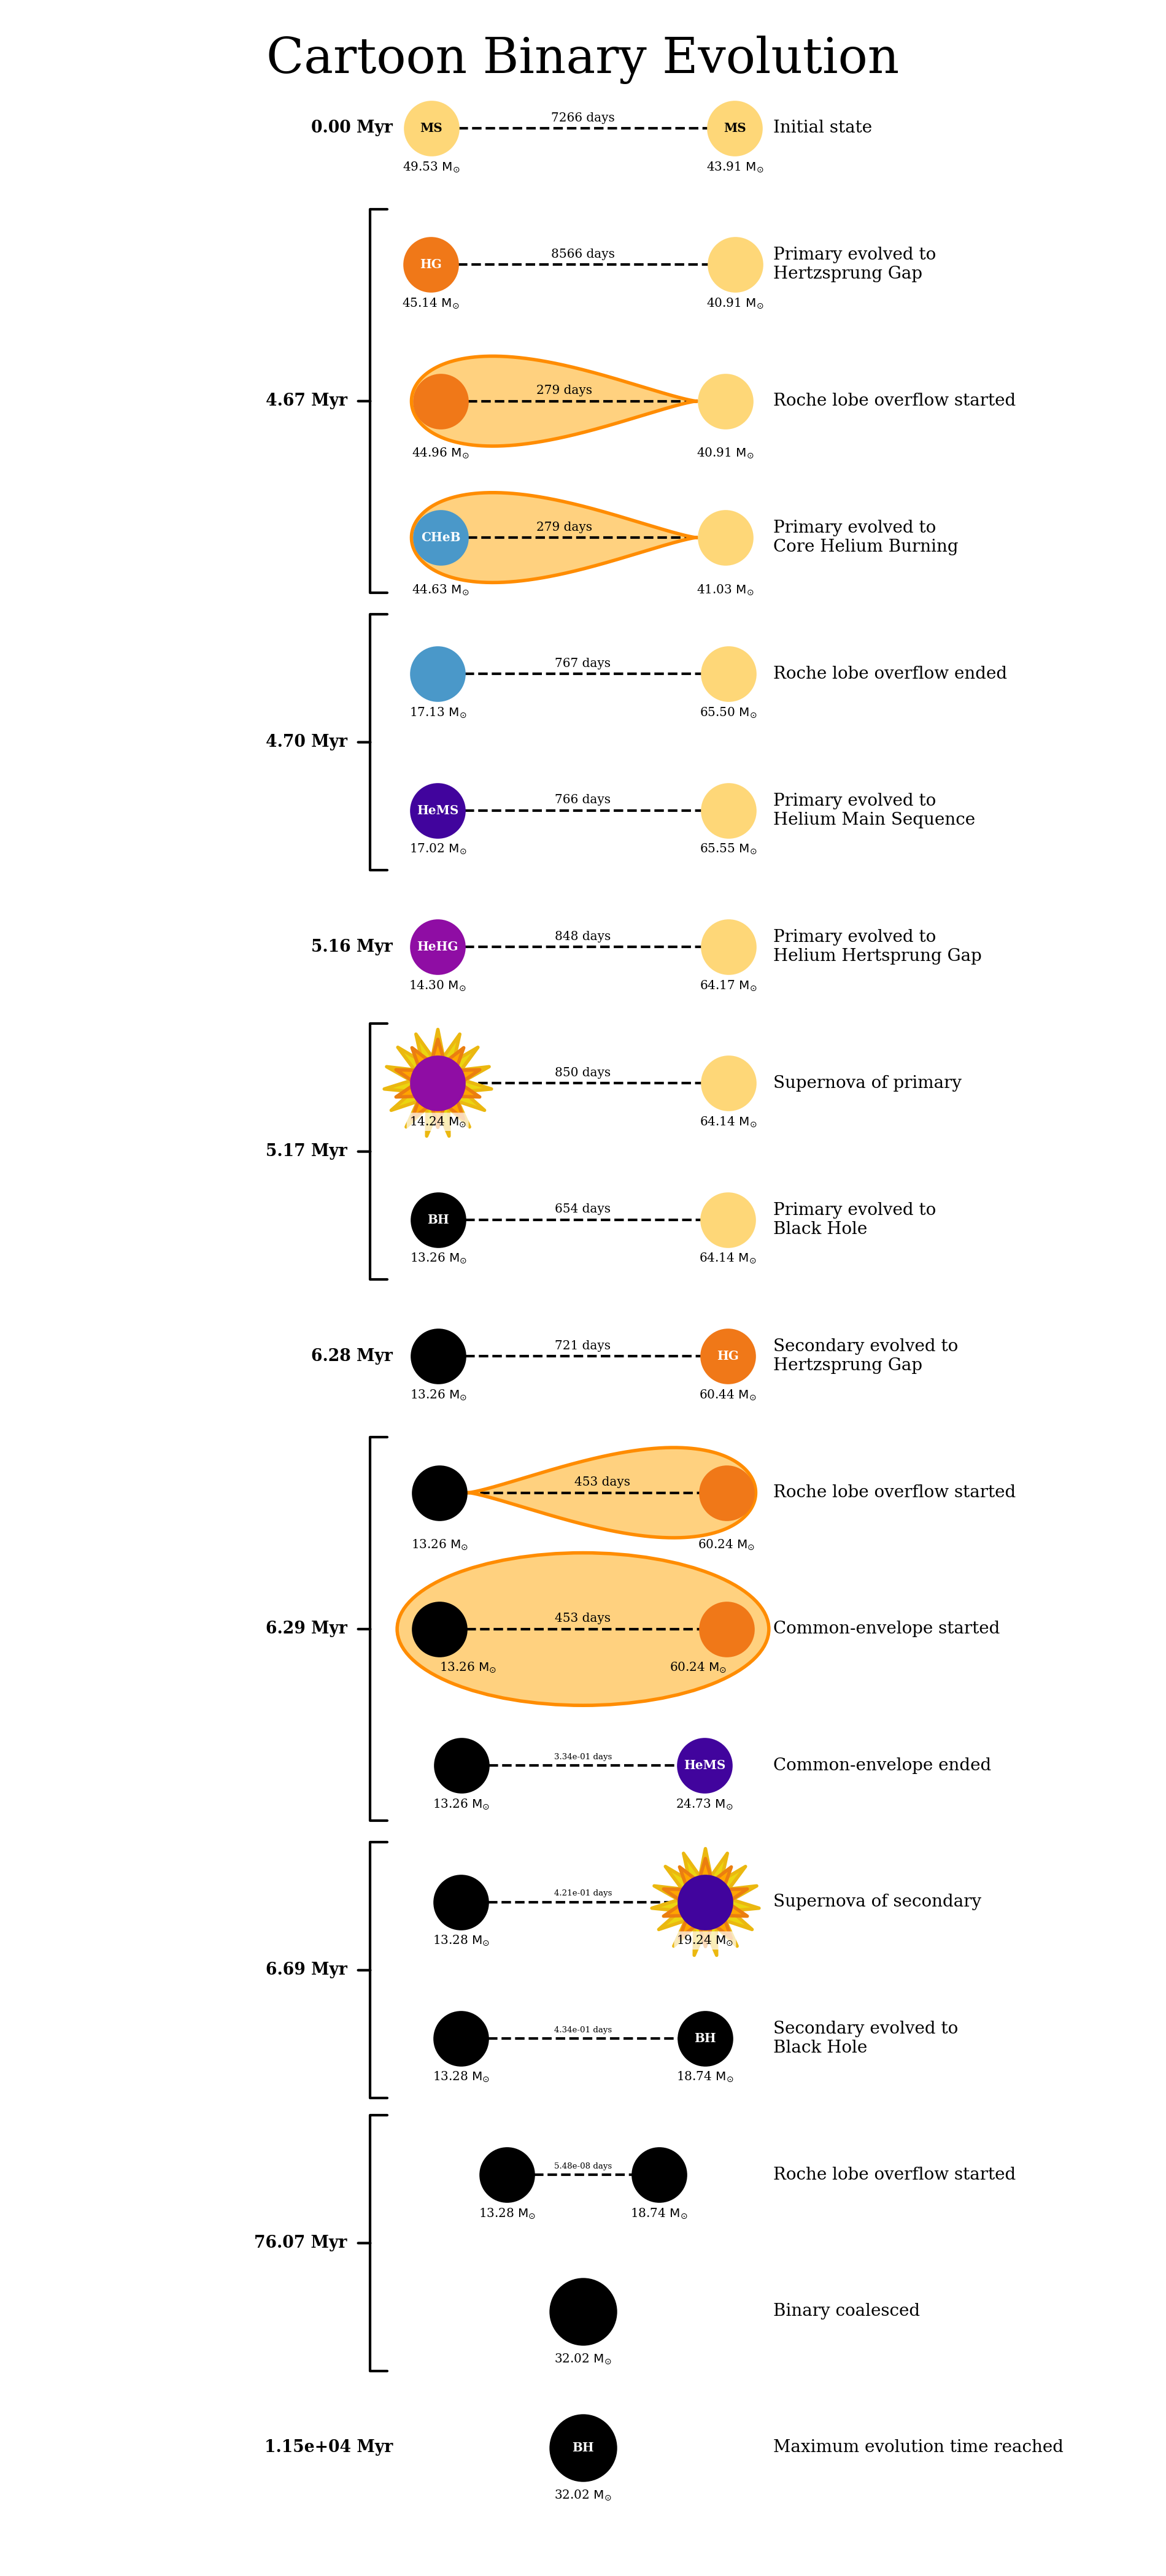

(<Figure size 1200x2700 with 1 Axes>, <Axes: >)

In [122]:
xrbs.plot_cartoon_binary(closest_bin_num)